### Práctica de Formatos de datos: XML

El objetivo de esta práctica es crear una aplicación que gestionará información sobre los restaurantes de la ciudad de Madrid. 

Para ello se va a usar el catálogo "Restaurantes con perfil turístico de la ciudad de Madrid" del portal de datos abiertos del Ayuntamiento de Madrid. El conjunto de datos incluye información sobre restaurantes de la ciudad de Madrid divididos por tipos de cocina, especialidades, servicios, etc. Así mismo, se incluyen los datos básicos de cada punto, una descripción, su geoposición y dirección postal, así como un conjunto de fotografías relativas a cada punto. En los casos en los que aplica, se ofrecen horarios de apertura y costes de acceso si los tuviera.
La información se encuentra en:
https://datos.madrid.es/sites/v/index.jsp?vgnextoid=ce33a73970504510VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD

Y el conjunto de datos XML que hay que procesar está situado en:
https://datos.madrid.es/egob/catalogo/300033-10037079-turismo-restauracion.xml

Junto al enunciado de la práctica se proporciona el fichero xml a tratar. El siguiente trozo de código permite recuperar el archivo xml en cuestion, y mostrar su contenido.

In [1]:
def InfoRestaurante(numero, imagen):
    i=0
    #Bucle para recorrer el xml
    result = ""
    for element in raiz:
        #Si es el seleccionado por el usuario muestra su informacion
        if(i == numero):
            #Si la etiqueta es service
            if(element.tag == "service"):
                #Recorrer los elementos de la etiqueta service
                for genericData in element:
                    #Si la etiqueta es basicData
                    if (genericData.tag == "basicData"):
                        #Recorrer los elementos de la etiqueta basicData
                        for basicData in genericData:
                            #Guardar nombre, email, telefono, descripcion y la pagina web
                            if(basicData.tag == "name"):
                                result += "\n\033[1mNOMBRE\033[0m: \n" + vacio(basicData.text, False) + "\n"
                            elif(basicData.tag == "email"):
                                result += "\n\033[1mEMAIL\033[0m: \n" + vacio(basicData.text, False) + "\n"
                            elif(basicData.tag == "phone"):
                                result += "\n\033[1mTELEFONO\033[0m: \n" + vacio(basicData.text, False) + "\n"
                            elif(basicData.tag == "body"):
                                result += "\n\033[1mDESCRIPCION\033[0m: \n" + vacio(basicData.text, True) + "\n"
                            elif(basicData.tag == "web"):
                                result += "\n\033[1mPAGINA WEB\033[0m: \n" + vacio(basicData.text, False) + "\n"
                    #Si la etiqueta es geoData
                    elif (genericData.tag == "geoData"):
                        address = ""
                        zipcode = ""
                        comunidad = ""
                         #Recorrer los elementos de la etiqueta geoData
                        for geoData in genericData:
                            if(geoData.tag == "address"):
                                address = vacio(geoData.text, False)
                            elif(geoData.tag == "zipcode"):
                                zipcode = vacio(geoData.text, False)
                            elif(geoData.tag == "subAdministrativeArea"):
                                comunidad = vacio(geoData.text, False)
                        #Guardar calle, CP y comunidad
                        result += "\n\033[1mLOCALIZACION\033[0m: \n" + address + ". " + comunidad + " " + zipcode + "\n"
                    #Si la etiqueta es multimedia
                    elif (genericData.tag == "multimedia"):
                        #Recorrer los elementos de la etiqueta multimedia
                        for multimedia in genericData:
                            #Si la etiqueta es media
                            if(multimedia.tag=="media"):
                                #Recorrer los elementos de la etiqueta media
                                for media in multimedia:
                                    #Si la etiqueta es url
                                    if(media.tag == "url"):
                                        #Añadir en la lista de imagenes
                                        imagen.append(media.text)
                    #Si la etiqueta es extradata
                    elif (genericData.tag == "extradata"):
                        #Recorrer los elementos de la etiqueta extradata
                        for extradata in genericData:
                            #Si la etiqueta es name == Horario
                            if(extradata.attrib.get("name") == "Horario"):
                                result += "\n\033[1mHORARIO\033[0m: \n" + vacio(extradata.text, True) + "\n"
                            #Si la etiqueta es categorias
                            elif(extradata.tag == "categorias"):
                                cat = ""
                                sub = ""
                                result += "\n\033[1mTIPO DE COCINA\033[0m:"
                                #Recorrer los elementos de la etiqueta categorias
                                for categorias in extradata:
                                    #Si la etiqueta es categoria
                                    if(categorias.tag == "categoria"):
                                        #Recorrer los elementos de la etiqueta categoria
                                        for categoria in categorias:
                                            #Si la etiqueta es name == Categoria
                                            if(categoria.attrib.get("name") == "Categoria"):
                                                cat = categoria.text
                                            #Si la etiqueta es subcategorias
                                            elif(categoria.tag == "subcategorias"):
                                                #Recorrer los elementos de la etiqueta subcategorias
                                                for subcategorias in categoria:
                                                    #Si la etiqueta es subcategoria
                                                    if(subcategorias.tag == "subcategoria"):
                                                        #Recorrer los elementos de la etiqueta subcategoria
                                                        for subcategoria in subcategorias:
                                                            #Si la etiqueta es name == SubCategoria
                                                             if(subcategoria.attrib.get("name") == "SubCategoria"):
                                                                    sub += subcategoria.text + ", "
                                    h = cat + ": " + sub
                                    #Guardar todas las informaciones de las categorias
                                    result += "\n" + h[0:len(h) - 2] 
                                result += "\n"
                               
        i = i + 1
    return result

def mostrarTodosRestaurantes(arbol):
    i=1
    for nodo in arbol.iter("name"):
        print(str(i) + ". ", unescape(nodo.text))
        i=i+1
        
def eliminarEtiquetas(texto):
    pila = list()
    result = ""
    for i in texto:
        if(i == "<"):
            pila.append(i)
        elif(i == ">"):
            pila.pop()
        elif(len(pila) == 0):
            result += i
    return result

def vacio(entrada, eliminar):
    result = ""
    if not entrada is None:
        if eliminar:
            result = eliminarEtiquetas(unescape(entrada))
        else:
            result = unescape(entrada)
    else:
        result = "Desconocido"
    return result.strip()

def mostrarImagenes(lista):
    print("¿Quieres que se muestren las imagenes del restaurante?(SI/NO): ")
    respuesta = input()
    #En caso afirmativo mostrar las imagenes
    if(respuesta.upper() == "SI"):
        for i in lista:
            img_src = i
            from skimage import io
            image = io.imread(img_src)
            io.imshow(image)
            io.show()
            
def otraBusqueda():
    #Preguntar si quiere realizar otra busqueda                            
    print("¿Quieres realizar otra busqueda?(SI/NO): ")
    respuesta = input()
    if(respuesta.upper() != "SI"):
        return False
    return True

def mostrarDiferentesTiposCocina(arbol):
    lista = list()
    for nodo in arbol.iter("item"):
        if(nodo.attrib.get("name") == "Categoria"):
            if(lista.count(nodo.text) == 0):
                lista.append(nodo.text)
    k = 1
    for i in lista:
        print(str(k) + ". " + i)
        k += 1

def buscarRestaurantePorNombre(nombre):
    i = 0
    for nodo in arbol.iter("name"):
        if(vacio(nodo.text, False) == nombre):
            return i
        i += 1


__Ejercicio 1 [5 puntos]__

Se pide mostrar al usuario un listado de los nombres de los restaurantes que contiene el archivo con el objetivo de que elija un restaurante y se le muestre de forma amigable(sin etiquetas) por pantalla la información asociada al restaurante que se encuentra en el fichero recuperado:

* Nombre del restaurante: etiqueta name
* Email: etiqueta email
* Teléfono: etiqueta phone
* Descripción: etiqueta body
* Página web: etiqueta web
* Dirección: etiqueta address, etiqueta zipcode
* Horario: etiqueta horario
* Tipo de cocina: etiqueta Tipo


A continuación se le pedira si quiere ver fotos del restaurante, en tal caso se le mostrarán las fotos recuperadas del restaurante. Para mostrar las imagenes puedes usar un trozo de código similar al siguiente.

---------------------------Comienzo---------------------------

1.  Robuchon España
2.  Abbasïd
3.  El Lince
4.  Hasaku Nikkei
5.  La Negra Tomasa
6.  Desde 1911
7.  Papagena
8.  RavioXO
9.  Inclán Brutal Bar
10.  DSPEAK
11.  Mad Gourmets
12.  Zen Noodle Bar
13.  ZEN Asian Supper Club
14.  Madame Butterfly
15.  Bakan
16.  Sagrario Tradición
17.  Garelos
18.  NOI
19.  Vinoteca Moratín
20.  Casa Mortero
21.  Taberna Úbeda
22.  Quimbaya
23.  Trattoria Adriana
24.  La Única
25.  Commodore Madrid
26.  La más croqueta
27.  El Taller
28.  Miss Sushi
29.  La Terraza del Santo Domingo
30.  MO de Movimiento
31.  Coquetto Bar
32.  Shukran City Ventas
33.  Santa y Pura
34.  Mune Madrid
35.  Leña
36.  Smoked Room
37.  Barbecho 
38.  Diurno
39.  Deessa
40.  Villa Verbena
41.  Citynizer Plaza
42.  Barracuda MX
43.  Aloha Poké
44.  Tripea
45.  Castelados
46.  La Maruca
47.  La MaMá Restaurante
48.  Quinqué
49.  Saddle
50.  Bocanegra
51.  Dani Brasserie
52.  Bloom
53.  La Venencia
54.  Gran Vía 55
55. 

1

NOMBRE: 
Robuchon España

EMAIL: 
reservascastellana@jrobuchon.com

TELEFONO: 
(+34) 916 709 495

DESCRIPCION: 
El grupo de restauración francés Joël Robuchon International, que atesora 27 estrellas Michelin, se instala en Madrid en el local en el que estuvo el mítico Embassy. En el que es el primer restaurante del grupo en España, el comensal puede disfrutar de una propuesta gastronómica que bebe de las creaciones del propio chef francés, en tres espacios diferentes, de la mano del chef español Jorge González.Robuchon Madrid se divide en tres plantas con zonas diferenciadas. La planta baja acoge L’Ambassade, un espacio informal que comprende cuatro de los seis espacios singulares del local. Se divide en una zona de Showcooking, un concepto de cocina abierta donde disfrutar de la magia de cada plato; el clásico Tea Longe, casual pero sofisticado; un Tapas Bar, nada más entrar al restaurante, donde descubrir la forma en que Joël Robuchon entendía el bocado más popular de la gastronom

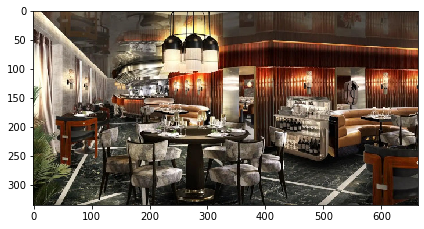

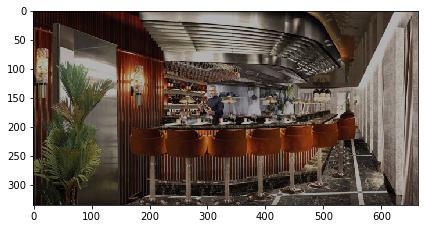

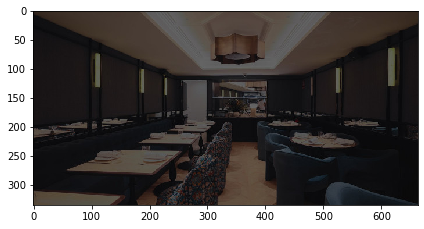

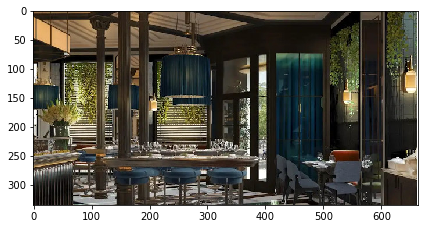

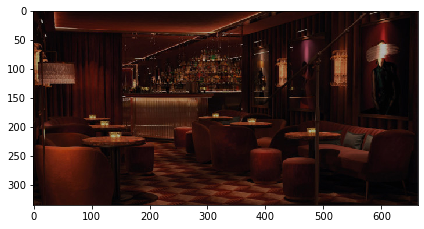

¿Quieres realizar otra busqueda?(SI/NO): 
no

---------------------------Fin---------------------------


In [2]:
from xml.etree import ElementTree
from html import unescape

f=open("restaurantes_v1_es.xml","rt",encoding="utf8")
arbol=ElementTree.parse(f)
raiz=arbol.getroot()

ok = True
print("---------------------------Comienzo---------------------------\n")
while ok:
    
    lista = list()
    
    #Motrar los nombres de los Restaurantes
    mostrarTodosRestaurantes(arbol)
    
    print("\nIntroduce el numero asociado al Restaurante: ")
    numero = input()
    
    #Mostrar la informacion del Restaurantes seleccionado por el usuario
    print(InfoRestaurante(int(numero) - 1, lista))
    
    #Mostrar o no las imagenes segun el usuario
    mostrarImagenes(lista)    
    
    #Realiar o no otra busqueda
    ok = otraBusqueda()        

print("\n---------------------------Fin---------------------------")

Despues de mostrar la información y las imagenes del restaurante elegido se le preguntará si desea volver a ver el listado de restaurantes para ver otro o bien desea finalizar.

Observar:
  * Algunas etiquetas podrían estar vacías o no aparecer. En estos casos, simplemente se mostrará vacío o con la palabra "Desconocido".
  * Hay que limpiar el texto de la descripción eliminando los símbolos especiales del tipo tales como "&lt;/p&gt;&lt;p&gt;" que aparecen en el mismo.

Por ejemplo si el usuario hubiera elegido el restaurante "Hasaku Nikkei" debería mostrarse por pantalla:

__Nombre del restaurante:__

Hasaku Nikkei
    
__Descripción:__
La apuesta culinaria por la cocina nikkei del chef peruano Jhosef Arias se traduce en este restaurante situado en el barrio de Las Tablas. De estética minimalista, en él se puede disfrutar de la mezcla de dos culturas gastronómicas: la peruana y la japonesa, una de las muestras más notorias de la fusión cultural a través de la cocina.El nombre Hasaku proviene del japonés y hace referencia a una naranja agria e híbrida, que, en este caso, tiene relación con la lima y los cítricos, hilo conductor de la cocina peruana. Con este nombre se busca ofrecer una especie de reconocimiento y agradecimiento a la enorme influencia que supuso la inmigración y la cocina japonesa en la gastronomía peruana.Hasaku comenzó siendo un proyecto virtual llevado a cabo durante el cierre de los restaurantes por la pandemia provocada por la COVID-19, al que el chef dedicó muchas horas de experimentación.En su carta se pueden encontrar platos excepcionales que se pueden disfrutar tanto en el local como en casa gracias a su servicio de envio a domicilio. No disponen de menú diario pero sí de dos menús degustación con los platos más destacados de su propuesta gastronomíca.Arias se ha convertido en un referente de la gastronomía peruana en Madrid, donde cuenta con otros restaurantes: Piscomar, en Lavapiés; Humo, en Puente de Vallecas; Callao24, en Arturo Soria; y su más reciente creación,ADN Origen Perú, en la calle Mayor, junto al Mercado de San Miguel. En todos ellos ensalza distintos aspectos de la gastronomía de su tierra. No en vano forma parte de los 50 chefs del movimiento Generación con Causa, creado en Perú para promover la cocina peruana en el mundo, a través de la cuarta generación de cocineros, avalados por el reconocido chef peruano Gastón Acurio.

__Página web:__

https://www.esmadrid.com/restaurantes/hasaku-nikkei
    
__Email:__

Desconocido
    
__Teléfono:__

(+34) 91 210 54 43

__Localización:__ 

María Tubau, 17. Madrid 28050

__Horario:__ 

Mar; Sáb: 13:00-16:00h/20:00- 01:00 ; Domingo: 13:00-16:00 h

__Tipo de cocina:__ 

Internacional: Fusión, Internacional, Japonesa, Peruana

__Ejercicio 2 [2.5 puntos]__

Este ejercicio se pide crear un buscador sobre la información recuperada, de forma que el usuario podrá buscar restaurantes por el tipo de cocina ofrecida en un restaurante. Para ello se le mostrará un listado con los diferentes tipos de cocina que se han encontrado en el fichero, y el usuario elegirá un tipo de cocina.  Como resultado debería mostrarse un listado de todas los restaurantes que cumplen las condiciones impuestas por el usuario. Se mostrará los nombres de los restaurantes. A continuación el usuario elegirá uno de los restaurantes y entonces se le mostrará  la misma información del restaurante que en el ejercicio 1. 

Después de mostrarle la información, se le volverá a preguntar si quiere seguir buscando. Entre las opciones del menú deberá existir una que sea para finalizar la búsqueda.

In [3]:
from xml.etree import ElementTree
from html import unescape

f=open("restaurantes_v1_es.xml","rt",encoding="utf8")
arbol=ElementTree.parse(f)
raiz=arbol.getroot()

ok = True
print("---------------------------Comienzo---------------------------\n")

while ok:
    
    #Mostrar diferentes Tipos de Cocina
    mostrarDiferentesTiposCocina(arbol)
    
    #Introducir el Tipo de Cocina
    print("\nSeleccione el tipo de cocina o introduzca Finalizar Busqueda: ")
    cocina = input()
    print("\n")
    if(cocina.lower() == "finalizar busqueda"):
        break
    
    listaRest= list()
    cont = 0
    for element in raiz:
        if(element.tag == "service"):
            for genericData in element:
                if (genericData.tag == "basicData"):
                    for basicData in genericData:
                        if(basicData.tag == "name"):
                            listaRest.append(vacio(basicData.text, False))
                elif (genericData.tag == "extradata"):
                    for extradata in genericData:
                        if(extradata.tag == "categorias"):
                            cat = ""
                            for categorias in extradata:
                                if(categorias.tag == "categoria"):
                                    for categoria in categorias:
                                        if(categoria.attrib.get("name") == "Categoria"):
                                            cat = (unescape(categoria.text)).strip()
                                            if(cat == cocina):
                                                cont += 1
                                                
                                                
                    if(cont < 1 and len(listaRest)>0):
                        listaRest.pop()
                    cont = 0    
    
    
    j = 1
    print("Lista de Restaurantes:\n")
    for rest in listaRest:
        print(str(j) + ". " + rest)
        j +=1
        
    print("\nIntroduce el nombre del Restaurante o introduzca Finalizar Busqueda: ")
    nombre = input()
    print("\n")
    if(nombre.lower() == "finalizar busqueda"):
        break
    
    #Buscar el restaurante por el nombre
    cont = buscarRestaurantePorNombre(nombre)
    
    #Mostrar la informacion del Restaurantes seleccionado por el usuario
    print(InfoRestaurante(cont, list()))
    
    #Realiar o no otra busqueda
    ok = otraBusqueda()  

print("\n---------------------------Fin---------------------------")

---------------------------Comienzo---------------------------

1. Internacional
2. De autor
3. Tapas
4. Española
5. Multiespacio
6. Tabernas
7. Especiales
8. Bares
9. Vegano
10. Vegetariano

Seleccione el tipo de cocina o introduzca Finalizar Busqueda: 
Internacional


Lista de Restaurantes:

1. Robuchon España
2. Hasaku Nikkei
3. La Negra Tomasa
4. Inclán Brutal Bar
5. Zen Noodle Bar
6. ZEN Asian Supper Club
7. Madame Butterfly
8. Bakan
9. NOI
10. Quimbaya
11. Trattoria Adriana
12. La Única
13. Commodore Madrid
14. El Taller
15. Miss Sushi
16. MO de Movimiento
17. Shukran City Ventas
18. Mune Madrid
19. Diurno
20. Barracuda MX
21. Aloha Poké
22. Tripea
23. Bocanegra
24. Bloom
25. Gran Vía 55
26. Ovillo
27. Válgame Dios
28. Maddock
29. Yugo the Bunker
30. 99 KŌ Sushi Bar
31. Occhiali
32. Aitatxu
33. Hong Kong 70
34. Zest
35. Salutteria
36. Kippu
37. Pólvora
38. La Ventana de Flavia
39. Da Luca Trattoria - Pizzeria
40. Chido Castizo & Chingón
41. El Jefe Traveling Food
42. La Carlota
4

no

---------------------------Fin---------------------------


 __Ejercicio 3[2.5 puntos]__

Este ejercicio se pide crear un buscador de restaurantes por cercania a una calle indicada por el usuario. Para ello se usará la librería GeoPy que se usó en la práctica 2 y la información de latitud y longitud que aparece en el archivo xml de cada uno de los restaurantes. Se le preguntará al usuario que introduzca por teclado el nombre de la información de la calle, y la distancia en kilómetros de cercania.
 
Como resultado debería mostrarse un listado de todas los restaurantes que cumplen las condiciones impuestas por el usuario. Se mostrará los nombres de los restaurantes. A continuación el usuario elegirá uno de los restaurantes y entonces se le mostrará  la misma información del restaurante que en el ejercicio 1.  En caso de no existir un restaurante con las condiciones dadas, se mostrará un mensaje informativo.

 Después de mostrarle la información, se le volverá a preguntar si quiere seguir buscando. Entre las opciones del menú deberá existir una que sea para finalizar la búsqueda.

In [4]:
from xml.etree import ElementTree
from html import unescape

f=open("restaurantes_v1_es.xml","rt",encoding="utf8")
arbol=ElementTree.parse(f)
raiz=arbol.getroot()

from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km   

def listaRestaurantes(lista):
    for i in lista:
        print(i)

ok = True
print("---------------------------Comienzo---------------------------\n")
while ok:
    
    #Obtener una direccion
    print("Introduce segun este formato: Calle, Comunidad, Pais o Finalizar Busqueda: ")
    calle = input()
    print("\n")
    if(calle.lower() == "finalizar busqueda"):
        break
    
    #Obtener una distancia
    print("Introduce una distancia en km o Finalizar Busqueda: ")
    distancia = input()
    print("\n")
    if(distancia.lower() == "finalizar busqueda"):
        break
        
    from geopy.geocoders import Nominatim
    geolocator = Nominatim(user_agent="Ejemplo")
    location = geolocator.geocode(calle, addressdetails=True)
    
    i=0
    lista = list()
    listaNombre = list()
    enc = False
    #Bucle para recorrer el xml
    for element in raiz:
        #Si la etiqueta es service
        if(element.tag == "service"):
            #Recorrer los elementos de la etiqueta service
            result = ""
            name = ""
            for genericData in element:
                #Si la etiqueta es basicData
                if (genericData.tag == "basicData"):
                    #Recorrer los elementos de la etiqueta basicData
                    for basicData in genericData:
                        #Guardar nombre, email, telefono, descripcion y la pagina web
                        if(basicData.tag == "name"):
                            name = vacio(basicData.text, False)
                            result += "\n\033[1mNOMBRE\033[0m: \n" + name + "\n"
                        elif(basicData.tag == "email"):
                            result += "\n\033[1mEMAIL\033[0m: \n" + vacio(basicData.text, False) + "\n"
                        elif(basicData.tag == "phone"):
                            result += "\n\033[1mPHONE\033[0m: \n" + vacio(basicData.text, False) + "\n"
                        elif(basicData.tag == "body"):
                            result += "\n\033[1mBODY\033[0m: \n" + vacio(basicData.text, True) + "\n"
                        elif(basicData.tag == "web"):
                            result += "\n\033[1mWEB\033[0m: \n" + vacio(basicData.text, False) + "\n"
                #Si la etiqueta es geoData
                elif (genericData.tag == "geoData"):
                    address = ""
                    zipcode = ""
                    comunidad = ""
                    latitud = float()
                    longitud = float()
                     #Recorrer los elementos de la etiqueta geoData
                    for geoData in genericData:
                        if(geoData.tag == "address"):
                            address = vacio(geoData.text, False)
                        elif(geoData.tag == "zipcode"):
                            zipcode = vacio(geoData.text, False)
                        elif(geoData.tag == "subAdministrativeArea"):
                            comunidad = vacio(geoData.text, False)
                            #Comprobar si cumple la condicion
                            if(haversine(location.longitude, location.latitude, float(longitud), float(latitud)) < float(distancia)):
                                enc = True
                                i += 1
                        elif(geoData.tag == "latitude"):
                            latitud = vacio(geoData.text, False)
                        elif(geoData.tag == "longitude"):    
                            longitud = vacio(geoData.text, False)
                    #Guardar la localizacion    
                    result += "\n\033[1mLOCALIZACION\033[0m: \n" + address + " " + comunidad + " " + zipcode + "\n" 
                #Si la etiqueta es extradata
                elif (genericData.tag == "extradata"):
                    #Recorrer los elementos de la etiqueta extradata
                    for extradata in genericData:
                        #Si la etiqueta es name == Horario
                        if(extradata.attrib.get("name") == "Horario"):
                            #Guardar el horario
                            result += "\n\033[1mHorario\033[0m: \n" + vacio(extradata.text, True) + "\n" 
                        #Si la etiqueta es categorias
                        elif(extradata.tag == "categorias"):
                            cat = ""
                            sub = ""
                            result += "\n\033[1mTIPO DE COCINA\033[0m:"
                            #Recorrer los elementos de la etiqueta categorias
                            for categorias in extradata:
                                #Si la etiqueta es categoria
                                if(categorias.tag == "categoria"):
                                    #Recorrer los elementos de la etiqueta categoria
                                    for categoria in categorias:
                                        #Si la etiqueta es name == Categoria
                                        if(categoria.attrib.get("name") == "Categoria"):
                                            #Guardar la categoria
                                            cat = "\n" + categoria.text
                                        #Si la etiqueta es subcategorias
                                        elif(categoria.tag == "subcategorias"):
                                            #Recorrer los elementos de la etiqueta subcategorias
                                            for subcategorias in categoria:
                                                #Si la etiqueta es subcategoria
                                                if(subcategorias.tag == "subcategoria"):
                                                    #Recorrer los elementos de la etiqueta subcategoria
                                                    for subcategoria in subcategorias:
                                                        #Si la etiqueta es name == SubCategoria
                                                         if(subcategoria.attrib.get("name") == "SubCategoria"):
                                                                #Guardar las subcategorias de la categoria
                                                                sub += subcategoria.text + ", "
                                h = cat + ": " + sub
                                #Guardar todas las informaciones de las categorias
                                result += "\n" + h[0:len(h) - 2] 
                            result += "\n"
            #Si cumple la condicion, entonces lo guarda en el listado
            if enc:
                lista.append(result)
                listaNombre.append(str(i) + ". " +name)
                enc = False
    
    if(len(listaNombre)>0):
        
        #Mostrar los nombres de los restaurantes
        listaRestaurantes(listaNombre)

        #Preguntar el numero de restaurante  
        print("\nIntroduce el numero de Restaurante o Finalizar Busqueda: ")
        numero = input()
        if(numero.lower() == "finalizar busqueda"):
            break
        print(lista[int(numero) - 1])
    else:
        print("No hay ningun Restaurante cercano")
            
    #Realiar o no otra busqueda
    ok = otraBusqueda()    

print("\n---------------------------Fin---------------------------")

---------------------------Comienzo---------------------------

Introduce segun este formato: Calle, Comunidad, Pais o Finalizar Busqueda: 
C. de Cadiz, Madrid, España


Introduce una distancia en km o Finalizar Busqueda: 
0.1


1. La Negra Tomasa
2. Majaderitos Café
3. Las Bravas (Pje Matheu)

Introduce el numero de Restaurante o Finalizar Busqueda: 
3

NOMBRE: 
Las Bravas (Pje Matheu)

EMAIL: 
Desconocido

PHONE: 
(+34) 91 521 51 41

BODY: 
La estrella de este lugar, como no podía ser de otra manera, son las patatas bravas, cuya salsa, según aseguran, está patentada. Y, por supuesto, es de las que pican. Al grito de ‘¡Una de bravas!’, desde la cocina van saliendo a diestro y siniestro estas suculentas raciones de patatas. En su carta también se encuentran otras propuestas ‘a las bravas’ como la deliciosa tortilla o la sepia tres salsas. Son exquisitas además las gambas al ajillo, los calamares, el pulpo a la gallega, los chopitos y los boquerones fritos o en vinagre, por poner alguno

Normas de entrega

   * Fecha tope de entrega: 06/10/2022
   * La entrega se realizará subiendo al campus virtual un notebook de Jupyter con la solución. El archivo tendrá como nombre FormatosII_GrupoX donde X será el número de grupo correspondiente.
